## Linear Regression Practice Assignment 3

## Importing CSV and Printing to Ensure Proper File

In [1]:
#Reading the csv file

In [2]:
lr_data<-read.csv("regression_data.csv")
print(lr_data)
#assigning the data in the csv as a variable and printing said variable

   YearsExperience Salary
1              1.1  39343
2              1.3  46205
3              1.5  37731
4              2.0  43525
5              2.2  39891
6              2.9  56642
7              3.0  60150
8              3.2  54445
9              3.7  57189
10             4.0  63218


## Plotting Data

In [3]:
#creating the scatterplot with the plot command

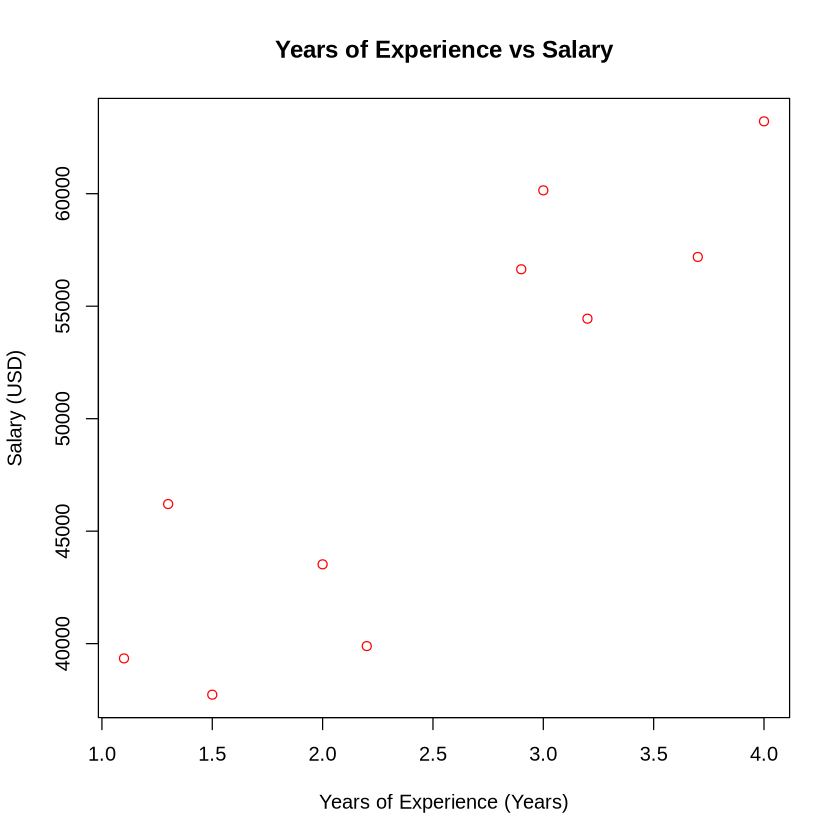

In [4]:
plot(lr_data$"YearsExperience", #Pulls X value data
     lr_data$"Salary", #pulls Y value data
     col="red", #color of the dots
     xlab = "Years of Experience (Years)", #x axis label
     ylab = "Salary (USD)", #y axis label
     main = "Years of Experience vs Salary", #graph title
     pch = 21) #type of data point

## Creating the Linear Regression Fit

In [5]:
#adding a line to the data

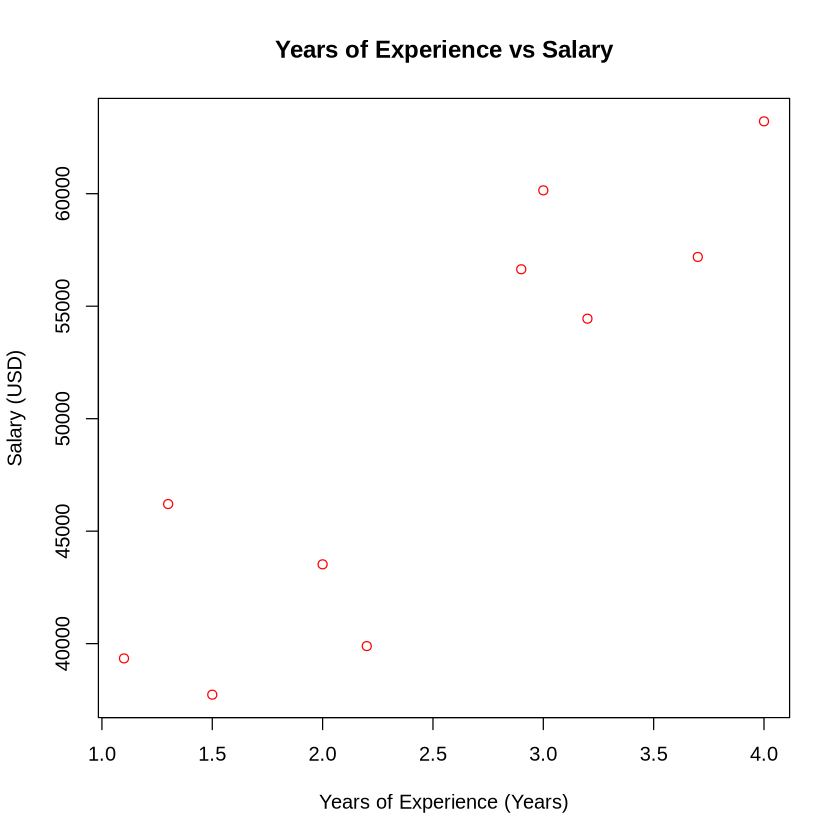

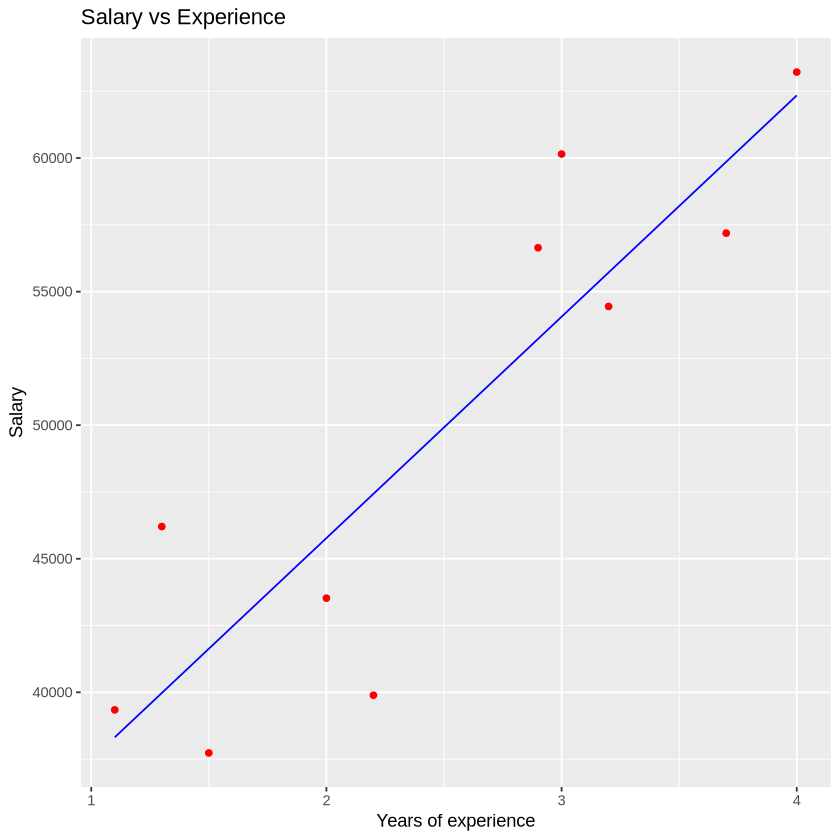

In [6]:
plot(lr_data$"YearsExperience", 
     lr_data$"Salary", 
     col="red", 
     xlab = "Years of Experience (Years)", 
     ylab = "Salary (USD)", 
     main = "Years of Experience vs Salary", 
     pch = 21) #redoing the plot because it looks fun

model <- lm(Salary ~ YearsExperience, data=lr_data) #creating the linear model

library(ggplot2)
ggplot() +
  geom_point(aes(x = lr_data$YearsExperience, y = lr_data$Salary), colour = 'red') + #generates the points of the combined scatter plot + LR
  geom_line(aes(x = lr_data$YearsExperience, y = predict(model, newdata = lr_data)), colour = 'blue') + #generates the line of the combined scatter plot + LR
  ggtitle('Salary vs Experience') + #the title of the combined plot
  xlab('Years of experience') + #the x axis label
  ylab('Salary') #the y axis label

[1] 0.7851516

Saving 7 x 7 in image


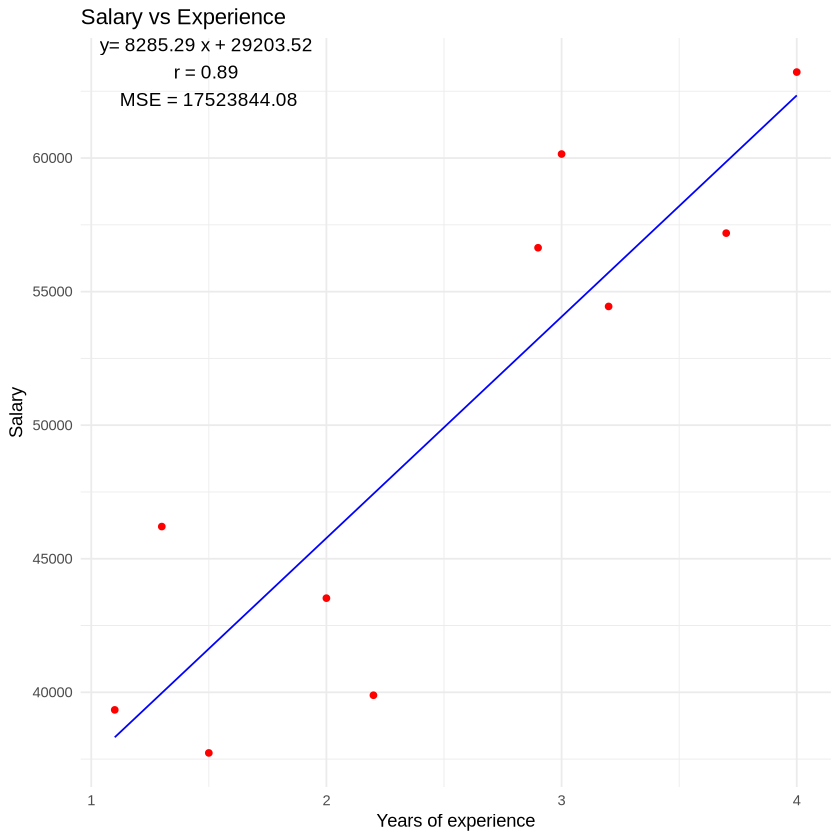

In [7]:
model <- lm(Salary ~ YearsExperience, data=lr_data) #creating the linear model
pred <- predict(model) #making a prediction model
mse <- mean((lr_data$"Salary" - pred)^2) #making the MSE
slope <- coef(model)[2] #slope
intercept <- coef(model)[1] #y-intercept
r <- cor(lr_data$'YearsExperience', lr_data$'Salary') #correlation coefficient
summary(model)$r.squared #r-squared value

library(ggplot2)
ggplot() +
  geom_point(aes(x = lr_data$YearsExperience, y = lr_data$Salary), colour = 'red') + #generates the points of the combined scatter plot + LR
  geom_line(aes(x = lr_data$YearsExperience, y = predict(model, newdata = lr_data)), colour = 'blue') + #generates the line of the combined scatter plot + LR
  annotate("text", x = 1.5, y = max(lr_data$Salary) - 0.5, #annoating the graph
           label = paste("y=", round(slope, 2), "x +", round(intercept, 2),
                        "\nr =", round(r, 2), "\nMSE =", round(mse, 2)), 
           size = 4) + 
  ggtitle('Salary vs Experience') + #the title of the combined plot
  xlab('Years of experience') + #the x axis label
  ylab('Salary') + #the y axis label
  theme_minimal() 

ggsave("updated_linear_regression_plot_r.png")

## STATISTICAL TESTS

In [8]:
summary(model) #How we are evaluating our model


Call:
lm(formula = Salary ~ YearsExperience, data = lr_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7540.2 -2564.9  -199.1  2814.8  6230.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        29204       4092   7.136 9.84e-05 ***
YearsExperience     8285       1532   5.407 0.000641 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4680 on 8 degrees of freedom
Multiple R-squared:  0.7852,	Adjusted R-squared:  0.7583 
F-statistic: 29.24 on 1 and 8 DF,  p-value: 0.0006407


In [9]:
#MSE Computation
pred <- predict(model) #making a prediction model
mse <- mean((lr_data$"Salary" - pred)^2) #making the MSE
print('MSE Equals:')
show(mse) #printing the MSE
if (mse >=0.00000001) { #analyzing the MSE value in a basic manner
    show("A high MSE value means that there is a large amount of variance in this data set. Tough luck.")
} else {
    show("A low MSE value means that there is a small amount of variance in this data set. Yay!")
    }

[1] "MSE Equals:"
[1] 17523844
[1] "A high MSE value means that there is a large amount of variance in this data set. Tough luck."


In [10]:
slope <- coef(model)[2] #slope
show(slope)
print('The slope of the linear regression line tells you for every unit increase of x, y should go up by about that much')
# in our linear regression example, for every one year of experience you accrue, it is predicted your salary increases by roughly 8000 USD

YearsExperience 
       8285.292 
[1] "The slope of the linear regression line tells you for every unit increase of x, y should go up by about that much"


In [11]:
intercept <- coef(model)[1] #y-intercept
show(intercept)
print('The y intercept of the linear regression line tells you what the dependent variable will be when the independent variable is zero')
# in our linear regression example, the starting salary for zero years of experience should be roughly 29000 USD

(Intercept) 
   29203.52 
[1] "The y intercept of the linear regression line tells you what the dependent variable will be when the independent variable is zero"


In [12]:
corrcoef <- cor(lr_data$'YearsExperience', lr_data$'Salary') #correlation coefficient
show(corrcoef)
print('the correlation coefficient tells you how linear the relationship between these two values are between -1 and +1')
# in our linear regression example, the correlation coefficient is close to positive one, indicating high linearity between the two

[1] 0.8860878
[1] "the correlation coefficient tells you how linear the relationship between these two values are between -1 and +1"


In [13]:
summary(model)$r.squared #r-squared value
print('the r-squared value shows how much of the variance in the dependence variable is explained by the independent variable')
# in our linear regression example, the r-squared value is 0.78, which I do not believe to be a great r-squared value. This means that the change in salary is only 78% due to the years of experience.

[1] 0.7851516

[1] "the r-squared value shows how much of the variance in the dependence variable is explained by the independent variable"
